In [1]:
import numpy as np
import pandas as pd

In [8]:
def backtest(df,side,period,exit_date,ret_side):
    
    '''
    The purpose of this function is to compute a cumulative return of a strategy with a predefined max holding period. 
    If a limit exit order is not filled within the period, the position exits by a market order, in which a close price
    is used to simulate this. 
    
    input
    -df: You can see below
    -side: y_pred_buy_by_pcv or y_pred_sell_by_pcv
    -period: How many trading periods you hold a position. If 3 is set, 2 pos at the same time happens just in one trading period.
    -exit_date: buy_exit_date or sell_exit_date
    -modified: y_buy/sell modified
    ret_side:y_buy or y_sell
 
    
    out:
    -df:The dataframe with one new column added named 'modified' 
    
    '''
    ret_realized_ind=[]
    
    for n,(i,v) in enumerate(df[df[side] > 0][exit_date].iteritems()):
        
        if df[df[side] > 0].index[-period]==i:
            break

        elif df[df[side] > 0].index[n+period]>v:
            ret_realized_ind.append(i)
            
    df.loc[ret_realized_ind,'modified']=df.loc[ret_realized_ind,ret_side]#期間内に
    
    a={key:value for key,value in zip(df.index,np.arange(df.shape[0]))}
    
    # extract the cases where positions are not executed within a period
    for i in df[df[side]>0].drop(index=ret_realized_ind).index:
        if df.index[-period]<i:# = まではclose to compute returnの参照先が存在する
            break            
    # compute a return using one day before the period and the date when we opened a position 
        else:
            df.loc[i,'modified']=(df.iloc[a[i]+period-1]['close'])/(df.loc[i,'buy_price'])-1-2*df.loc[i,'maker fee']
            
    return df

In [2]:
df=pd.read_parquet('df_perfect01')
df

,open,high,low,close,maker fee,daily vol,BBANDS_upperband,BBANDS_middleband,BBANDS_lowerband,DEMA,...,buy_executed,sell_executed,buy_exit_date,exit_price_buy,y_buy,sell_exit_date,exit_price_sell,y_sell,y_pred_buy_by_pcv,y_pred_sell_by_pcv
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-02-23 05:50:00,49963.0,50600.0,48779.5,50060.0,-0.00025,0.029728,1565.719965,416.25,-733.219965,1207.837059,...,1,1,2021-02-23 06:35:00,50094.5,0.010622,2021-02-23 06:35:00,50094.5,-0.008070,0.002672,0.000671
2021-02-23 06:20:00,50842.0,51216.5,49530.0,50700.0,-0.00025,0.029862,809.986002,-288.85,-1387.686002,425.403967,...,1,0,2021-02-23 07:05:00,49562.0,-0.012327,2021-02-23 06:35:00,NaN,0.000000,-0.001554,0.000513
2021-02-23 06:35:00,50700.0,50863.5,50005.0,50169.0,-0.00025,0.030253,469.817542,-457.05,-1383.917542,211.108081,...,1,0,2021-02-23 07:35:00,50166.5,0.010303,2021-02-23 07:05:00,NaN,0.000000,-0.002941,0.001376
2021-02-23 07:05:00,49740.0,50465.0,49474.0,49860.5,-0.00025,0.030670,911.688266,69.70,-772.288266,501.199109,...,0,1,2021-02-23 07:35:00,NaN,0.000000,2021-02-23 07:50:00,49938.5,-0.007683,-0.000994,-0.002633
2021-02-23 07:35:00,50062.5,50560.5,49606.5,50558.0,-0.00025,0.030639,811.992971,186.00,-439.992971,318.906714,...,1,0,2021-02-23 08:05:00,49178.5,-0.017285,2021-02-23 07:50:00,NaN,0.000000,0.000015,-0.000338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-16 00:20:00,22650.5,22694.0,22398.0,22555.0,0.00010,0.053747,145.796931,39.90,-65.996931,-189.536198,...,0,1,2022-06-16 00:35:00,NaN,0.000000,2022-06-16 01:05:00,22771.0,-0.001669,0.001498,0.000507
2022-06-16 00:35:00,22555.0,22877.5,22464.5,22527.5,0.00010,0.054057,10.670640,-101.20,-213.070640,-266.317196,...,0,1,2022-06-16 01:05:00,NaN,0.000000,2022-06-16 01:05:00,NaN,0.000000,0.001825,0.001219
2022-06-16 01:05:00,22667.5,23032.5,22424.5,22951.5,0.00010,0.054733,239.011717,-91.70,-422.411717,-228.163243,...,1,0,2022-06-16 01:20:00,NaN,0.000000,2022-06-16 01:20:00,NaN,0.000000,-0.000897,-0.000512


<AxesSubplot:xlabel='timestamp'>

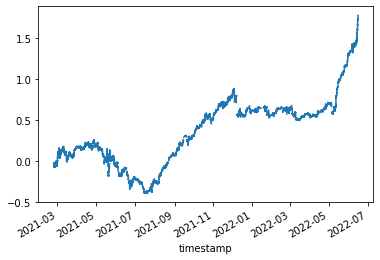

In [11]:
# The case where we are allowed to hold a position for 2 consecutive trading periods  
df=backtest(df,side='y_pred_buy_by_pcv',period=3,exit_date='buy_exit_date',ret_side='y_buy')
df.loc[:,'modified'].cumsum().plot()

<AxesSubplot:xlabel='timestamp'>

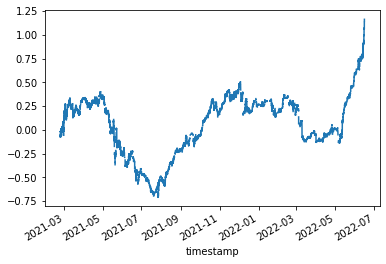

In [12]:
# The case where we are allowed to hold a position for 4 consecutive trading periods  
df=backtest(df,side='y_pred_buy_by_pcv',period=5,exit_date='buy_exit_date',ret_side='y_buy')
df.loc[:,'modified'].cumsum().plot()